<a href="https://colab.research.google.com/github/Gym28/DeepLearning/blob/main/deep_GinaMorenoPracticaipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame as DataFrame

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import os
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
pd.set_option('display.float_format', '{:.1f}'.format)

In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

Creamos una función donde importamos tensorflow 2x para que nos confirme si se esta usando el GPU para mejorar la velocidad de nuestros procesos

In [ ]:
#%tensorflow_version 2.x
#import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# nos descargamos el dataset de OpenDataSoft
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"



--2022-06-17 18:03:48--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [             <=>    ]  54.31M   661KB/s    in 2m 52s  

2022-06-17 18:06:52 (323 KB/s) - ‘airbnb-listings.csv’ saved [56950929]



Creamos una sesión Interactiva

In [ ]:
#sess=tf.compat.v1.InteractiveSession()

In [ ]:
!ls -lah

total 55M
drwxr-xr-x 1 root root 4.0K Jun 17 17:59 .
drwxr-xr-x 1 root root 4.0K Jun 17 17:54 ..
-rw-r--r-- 1 root root  55M Jun 17 18:06 airbnb-listings.csv
drwxr-xr-x 4 root root 4.0K Jun 15 13:41 .config
drwxr-xr-x 1 root root 4.0K Jun 15 13:42 sample_data


In [ ]:
#vamos a leer el dataset y enseñarémos los primeros 5 registros
data = pd.read_csv('/content/airbnb-listings.csv', sep = ';')
data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,15141125,https://www.airbnb.com/rooms/15141125,20170407214119,2017-04-08,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro""...",It's a bright and cosy studio located in the h...,"Charming bright and cosy studio in ""El Rastro""...",none,The studio is located in the remarkable neighb...,...,10.0,10.0,10.0,NaN,NaN,moderate,2,5.1,"40.40745268477803,-3.7079954754432634","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,9470166,https://www.airbnb.com/rooms/9470166,20170407214119,2017-04-08,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable...",Quiet and comfortable space where you can rela...,"In the center, recently remodeled, comfortable...",none,It belongs to the district center of Madrid wh...,...,9.0,9.0,8.0,NaN,NaN,strict,13,5.9,"40.40831556101927,-3.705006385704201","Host Has Profile Pic,Host Identity Verified,Re..."
2,17444981,https://www.airbnb.com/rooms/17444981,20170407214119,2017-04-08,Cosy Apartment SOL/LA LATINA,Nice apartment near Sol and La Latina. Perfect...,Is a really cosy apartment with the best locat...,Nice apartment near Sol and La Latina. Perfect...,none,"La Latina is well known by El Rastro, the most...",...,10.0,10.0,10.0,NaN,NaN,moderate,1,6.2,"40.413722014584295,-3.7068231186536718","Host Has Profile Pic,Host Identity Verified,Re..."
3,3284565,https://www.airbnb.com/rooms/3284565,20170407214119,2017-04-08,Alquiler Estudio Nuevo Madrid,"Alquilo estudio en el centro de Madrid , total...",NaN,"Alquilo estudio en el centro de Madrid , total...",none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,3,0.2,"40.411263372718054,-3.6973054373712886","Host Has Profile Pic,Host Identity Verified,Is..."
4,499911,https://www.airbnb.com/rooms/499911,20170407214119,2017-04-08,2 bedroom apartment downtown Madrid,NaN,Bright and airy apartment in Central Madrid re...,Bright and airy apartment in Central Madrid re...,none,NaN,...,10.0,10.0,10.0,NaN,NaN,strict,1,1.4,"40.41255625665078,-3.701155364799422","Host Is Superhost,Host Has Profile Pic,Host Id..."


In [ ]:
# vamos a ver de cuantos registros disponemos y de cuantas variables
data.shape


(14001, 89)

In [ ]:
# ¿De qué variables disponemos?
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [ ]:
data["City"].value_counts()

Madrid                                 13207
Barcelona                                292
马德里                                       52
Palma                                     49
Alcúdia                                   40
                                       ...  
Lloret de Vistalegre                       1
Puerto Pollensa (Palma de Mallorca)        1
Maioris Decima                             1
Sa Coma                                    1
Colonia Sant Pere                          1
Name: City, Length: 135, dtype: int64

Vemos que en la ciudad de Madrid están concentrada la mayor parte de la información decidimos dejar solo la ciudad de Madrid

In [ ]:
df_final = data[data['City'] == 'Madrid']
print(f'Dimensiones del dataset dfSoloMadrid: {df_final.shape}')

Dimensiones del dataset dfSoloMadrid: (13207, 89)


In [ ]:
df_final

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,3150371,https://www.airbnb.com/rooms/3150371,20170407214119,2017-04-08,Double room + bathroom - La Latina,"Double room with own bathroom in La Latina, in...",The apartment is spacious and cozy. It is 90 m...,"Double room with own bathroom in La Latina, in...",none,La Latina is one of the most famous neighbourh...,...,10.0,10.0,10.0,NaN,NaN,flexible,1,2.3,"40.41010608050749,-3.714754034177323","Host Has Profile Pic,Host Identity Verified,Is..."
1,3378181,https://www.airbnb.com/rooms/3378181,20170407214119,2017-04-08,"Ópera/Plz Mayor -- A/C, elevator",Old world charm meets modern comfort in our ne...,"Designed with the traveler in mind, our one-be...",Old world charm meets modern comfort in our ne...,none,The neighborhood is steeped in history and clo...,...,10.0,10.0,10.0,NaN,NaN,strict,2,2.7,"40.416968822636726,-3.7094389211089993","Host Has Profile Pic,Host Identity Verified,Is..."
2,2070750,https://www.airbnb.com/rooms/2070750,20170407214119,2017-04-08,Centric room with a balcony,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,none,-,...,9.0,10.0,9.0,NaN,NaN,flexible,4,0.6,"40.40970517560235,-3.7135611928841086","Host Has Profile Pic,Host Identity Verified,Is..."
3,9832499,https://www.airbnb.com/rooms/9832499,20170407214119,2017-04-08,PLAZA DE ESPAÑA - Único - Gimnasio.,"Ubicado en el famoso edificio Torre de Madrid,...","Ubicado en el famoso edificio Torre de Madrid,...","Ubicado en el famoso edificio Torre de Madrid,...",none,NaN,...,10.0,10.0,10.0,VT-1520,NaN,strict,9,3.6,"40.42319271738103,-3.7112486513892","Host Is Superhost,Host Has Profile Pic,Host Id..."
4,1868170,https://www.airbnb.com/rooms/1868170,20170407214119,2017-04-08,"Loft/duplex 150m2, 3 double rooms","Huge, open plan spacious apartment in the cent...","Huge, open plan spacious apartment in the cent...","Huge, open plan spacious apartment in the cent...",none,NaN,...,10.0,10.0,9.0,NaN,NaN,moderate,1,1.1,"40.416513932601625,-3.7178427529546973","Host Is Superhost,Host Has Profile Pic,Host Id..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,14569945,https://www.airbnb.com/rooms/14569945,20170407214119,2017-04-08,"Madrid, City Center, Super Bright Designer Unit",Wonderful designer apartment in the most vibra...,"The apartment has two bedrooms, both with balc...",Wonderful designer apartment in the most vibra...,none,If you are traveling to Madrid either for plea...,...,10.0,10.0,10.0,NaN,NaN,flexible,2,2.5,"40.42498846597062,-3.7023642849918486","Host Has Profile Pic,Host Identity Verified,Is..."
13990,11556979,https://www.airbnb.com/rooms/11556979,20170407214119,2017-04-08,Coqueto apartamento en Plaza España,"El apartamento está en el corazón de Madrid, e...",NaN,"El apartamento está en el corazón de Madrid, e...",none,NaN,...,10.0,10.0,9.0,NaN,NaN,moderate,1,2.5,"40.42516615049822,-3.7109593840085373","Host Has Profile Pic,Is Location Exact,Require..."
13991,707670,https://www.airbnb.com/rooms/707670,20170407214119,2017-04-08,centro (Chueca-Argüelles) 2rooms,NaN,Moderno apartamento tipo loft centrico (entre ...,Moderno apartamento tipo loft centrico (entre ...,none,NaN,...,7.0,9.0,6.0,NaN,NaN,flexible,3,0.2,"40.4291955495624,-3.706742610332301","Host Has Profile Pic,Is Location Exact,Require..."
13992,13648498,https://www.airbnb.com/rooms/13648498,20170407214119,2017-04-08,"Central flat with pool, gym & sauna -Gran Vía ...",With a fantastic location just off the vibrant...,Situated on the seventh floor of a modern buil...,With a fantastic location just off the vibrant...,none,With a fantastic location just off

Ahora queremos ver los Missing Values de las variables del DataFrame

In [ ]:
round(df_final.isnull().mean()*100,2).sort_values(ascending=False)

Has Availability       100.0
Host Acceptance Rate   100.0
Jurisdiction Names     100.0
License                 98.1
Square Feet             96.1
                        ... 
Accommodates             0.0
Bed Type                 0.0
Guests Included          0.0
Extra People             0.0
Features                 0.0
Length: 89, dtype: float64

Para visulizar los posibles valores anómalos y poder evitar outliers usamos la función describe, aquí podemos ver que en baños tenemos un posible outliers (8), en nuestra variable objetivo precio también podemos ver que posiblemente habrá outliers, todo esto lo comprobarémos más adelante. 

In [ ]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,13207.0,10398417.5,5506712.7,18628.0,5820744.5,11539103.0,15334065.5,18109842.0
Scrape ID,13207.0,20170407214119.0,0.0,20170407214119.0,20170407214119.0,20170407214119.0,20170407214119.0,20170407214119.0
Host ID,13207.0,37328510.0,34313208.6,17453.0,7682961.5,27341850.0,57333049.0,124753355.0
Host Response Rate,11552.0,94.8,15.2,0.0,100.0,100.0,100.0,100.0
Host Acceptance Rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Host Listings Count,13204.0,9.8,27.6,0.0,1.0,2.0,5.0,265.0
Host Total Listings Count,13204.0,9.8,27.6,0.0,1.0,2.0,5.0,265.0
Latitude,13207.0,40.4,0.0,40.3,40.4,40.4,40.4,40.5
Longitude,13207.0,-3.7,0.0,-3.8,-3.7,-3.7,-3.7,-3.6
Accommodates,13207.0,3.2,2.0,1.0,2.0,2.0,4.0,16.0


Los histogramas ofrecen una buena forma de evaluar los datos. Lo usarémos para comprobar si existen valores extremos o atípicos en nuestras variables y ver la distribución de sus datos. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6dd6af1d50>,
      dtype=object)

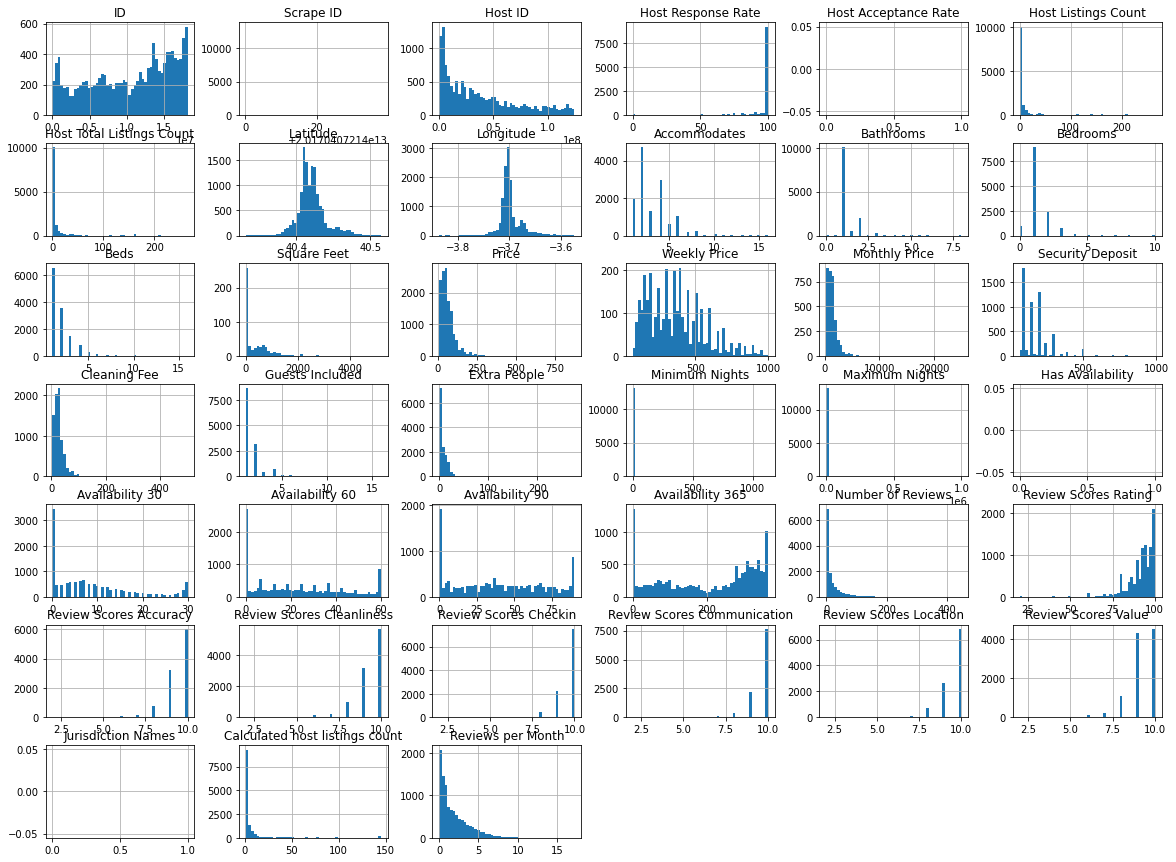

In [ ]:
df_final.hist(bins=50, figsize=(20,15))

Para no continuar con la evaluación de variables que eliminarémos según información dada por nuestra profesora, procederemos a eliminar las varialbles que no usarémos

In [ ]:
data_regression=df_final.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Medium Url', 
       'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location','Host About', 'Host Response Time', 
       'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url','Host Neighbourhood', 'Host Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed','Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Bed Type', 'Amenities', 'Square Feet', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee','Calendar Updated','Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped', 'First Review', 'Last Review', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'License', 
       'Jurisdiction Names', 'Calculated host listings count', 'Reviews per Month', 'Geolocation', 'Features'], axis=1)

In [ ]:
data_regression

,Thumbnail Url,Host Total Listings Count,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Cancellation Policy
0,https://a0.muscache.com/im/pictures/40713802/3...,1.0,Apartment,Private room,2,1.0,1.0,1.0,36.0,1,0,2,1125,80,flexible
1,https://a0.muscache.com/im/pictures/44239584/c...,3.0,Apartment,Entire home/apt,2,1.0,1.0,1.0,85.0,1,0,3,1125,90,strict
2,https://a0.muscache.com/im/pictures/84378550/f...,4.0,Apartment,Private room,2,1.0,1.0,1.0,20.0,1,10,3,1125,20,flexible
3,https://a0.muscache.com/im/pictures/be441d1f-4...,10.0,Apartment,Entire home/apt,4,1.0,1.0,2.0,112.0,2,5,3,1900,55,strict
4,https://a0.muscache.com/im/pictures/c232f016-f...,1.0,Apartment,Entire home/apt,8,3.0,3.0,4.0,190.0,6,40,3,1125,46,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,https://a0.muscache.com/im/pictures/de26431e-3...,3.0,Apartment,Entire home/apt,4,2.0,2.0,2.0,110.0,1,0,3,1125,17,flexible
13990,https://a0.muscache.com/im/pictures/e8b44f30-e...,1.0,Apartment,Entire home/apt,2,1.0,0.0,1.0,55.0,1,0,3,1125,33,moderate
13991,https://a0.muscache.com/im/pictures/20174832/8...,3.0,Apartment,Entire home/apt,5,2.0,2.0,3.0,70.0,2,23,3,1125,10,flexible
13992,https://a0.muscache.com/im/pictures/e416b03c-c...,142.0,Apartment,Entire home/apt,4,2.0,2.0,2.0,232.0,2,17,3,1125,2,strict


In [ ]:
print(f'El numero de muestras es {data_regression.shape[0]} y la dimensionalidad de entrada es {data_regression.shape[1]}')



El numero de muestras es 13207 y la dimensionalidad de entrada es 15


In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = data_regression.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)


,variable_1,variable_2,r,abs_r
45,Beds,Accommodates,0.8,0.8
15,Accommodates,Beds,0.8,0.8
37,Bedrooms,Beds,0.7,0.7
47,Beds,Bedrooms,0.7,0.7
14,Accommodates,Bedrooms,0.7,0.7
34,Bedrooms,Accommodates,0.7,0.7
17,Accommodates,Guests Included,0.6,0.6
67,Guests Included,Accommodates,0.6,0.6
16,Accommodates,Price,0.6,0.6
56,Price,Accommodates,0.6,0.6


Una vez hecho la matriz de correlación podemos ver que las variables que nos han quedado tienen una buena correlación entre ellas.


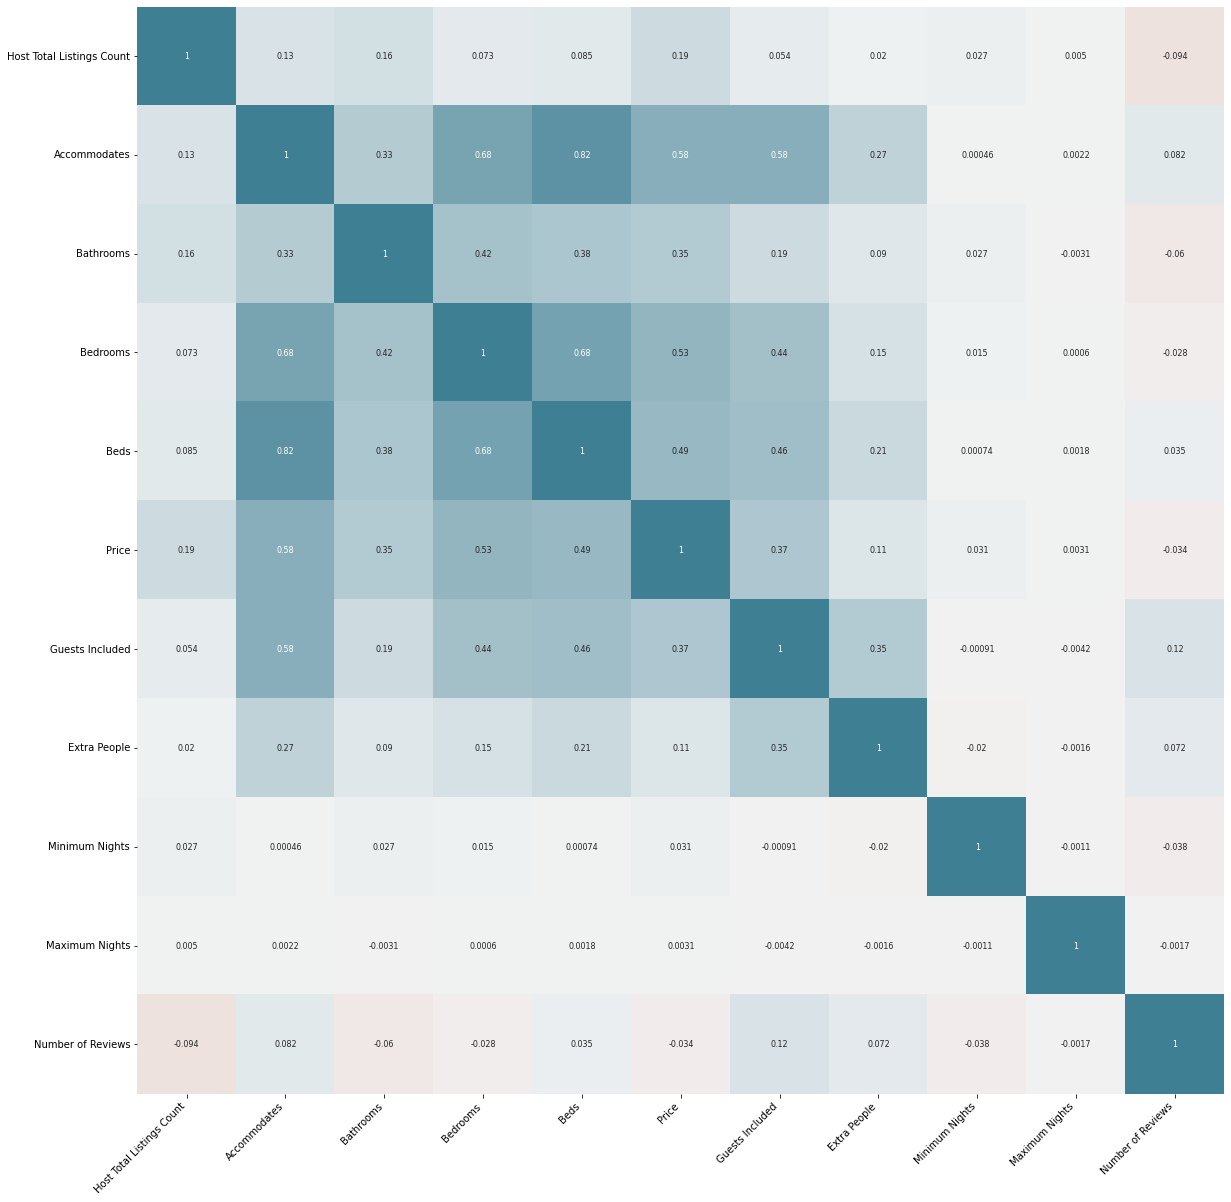

In [ ]:
# haremos un mapa de calor de las variables
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)



In [ ]:
#Con esto podremos ver el tipo de varialbes que tenemos, observamos que las variables númericas todas están en Float 64,  e Int, 
# Para poder hacer nuestro modelo de DeepLearning debemos hacer que todas estén en un mismo tipo de dato para poder procesarlos 
data_regression.dtypes

Thumbnail Url                 object
Host Total Listings Count    float64
Property Type                 object
Room Type                     object
Accommodates                   int64
Bathrooms                    float64
Bedrooms                     float64
Beds                         float64
Price                        float64
Guests Included                int64
Extra People                   int64
Minimum Nights                 int64
Maximum Nights                 int64
Number of Reviews              int64
Cancellation Policy           object
dtype: object

**ESTUDIO DE LOS VALORES NULOS**

In [ ]:
from numpy.lib.utils import info
data_regression.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13207 entries, 0 to 13993
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Thumbnail Url              10729 non-null  object 
 1   Host Total Listings Count  13204 non-null  float64
 2   Property Type              13207 non-null  object 
 3   Room Type                  13207 non-null  object 
 4   Accommodates               13207 non-null  int64  
 5   Bathrooms                  13158 non-null  float64
 6   Bedrooms                   13184 non-null  float64
 7   Beds                       13158 non-null  float64
 8   Price                      13198 non-null  float64
 9   Guests Included            13207 non-null  int64  
 10  Extra People               13207 non-null  int64  
 11  Minimum Nights             13207 non-null  int64  
 12  Maximum Nights             13207 non-null  int64  
 13  Number of Reviews          13207 non-null  int

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  




---


A partir de nuestra variable Thumbnail Url procesaremos las 
imagenes, para ello, a pesar que sabemos que en este punto deberíamos cargar las imágenes, por temas de prácticidad y ahorro de memoria lo que haremos será identificar los Missing Values de esta variable y los eliminarémos, ya que si no existen las imágenes ésta información no se puede generar e imputar.

---



In [ ]:
print(data_regression["Thumbnail Url"].isnull().sum())

2478


Para mantener un correcto numero de valores hemos decidido actualizar nuestro dataframe con las filas en donde Thumbnail Url contiene datos, quitaremos 2478 filas, pues el no tener información afectará nuestra red neuronal 

In [ ]:
df_regression = data_regression[data_regression['Thumbnail Url'].notna()]

In [ ]:
#para ver porcentaje de missing values
((df_regression.isnull().sum()/df_regression.shape[0])*100).sort_values(ascending=False)

Beds                        0.4
Bathrooms                   0.3
Bedrooms                    0.2
Price                       0.0
Host Total Listings Count   0.0
Thumbnail Url               0.0
Property Type               0.0
Room Type                   0.0
Accommodates                0.0
Guests Included             0.0
Extra People                0.0
Minimum Nights              0.0
Maximum Nights              0.0
Number of Reviews           0.0
Cancellation Policy         0.0
dtype: float64

In [ ]:
print(f'Dimensiones del dataset df_regression: {df_regression.shape}')

Dimensiones del dataset df_regression: (10729, 15)


In [ ]:
#Comprobamos que ya no tenemos datos nulos en las imágenes
print(df_regression["Thumbnail Url"].isnull().sum())

0


** EVALUACIÓN UNIVARIALBE DE LOS DATOS NÚMERICOS**
Con esto pretendemos manejar los outliers

In [ ]:
#Nuestra variable Objetivo es Price, así que iniciaremos con su estudio 
df_regression['Price'].describe()


count   10725.0
mean       61.6
std        52.3
min         9.0
25%        30.0
50%        50.0
75%        75.0
max       850.0
Name: Price, dtype: float64

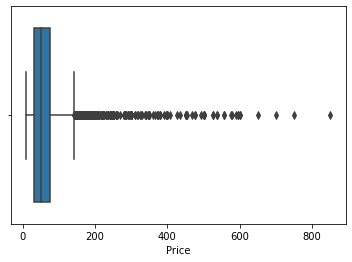

In [ ]:
#BoxPlot
sns.boxplot(x="Price", data=df_regression)

In [ ]:
df_regression["Price"].value_counts()

50.0     492
25.0     477
30.0     470
20.0     394
35.0     394
        ... 
117.0      1
141.0      1
325.0      1
174.0      1
232.0      1
Name: Price, Length: 252, dtype: int64

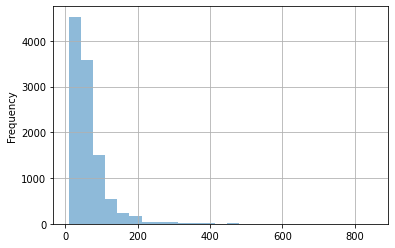

In [ ]:
df_regression['Price'].plot.hist(alpha=0.5, bins=25, grid=True)

In [ ]:
#eliminaremos los precios mayores a 150 que aunque podemos eliminar mas, preferimos mantener una posición conservadora 
df_regression = df_regression[df_regression['Price'] < 130]

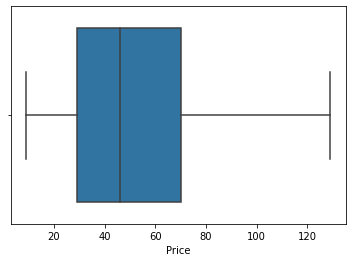

In [ ]:
#BoxPlot
sns.boxplot(x="Price", data=df_regression)

In [ ]:
print(f'Dimensiones del dataset df_regression: {df_regression.shape}')

Dimensiones del dataset df_regression: (9985, 15)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6dd0670ad0>,
      dtype=object)

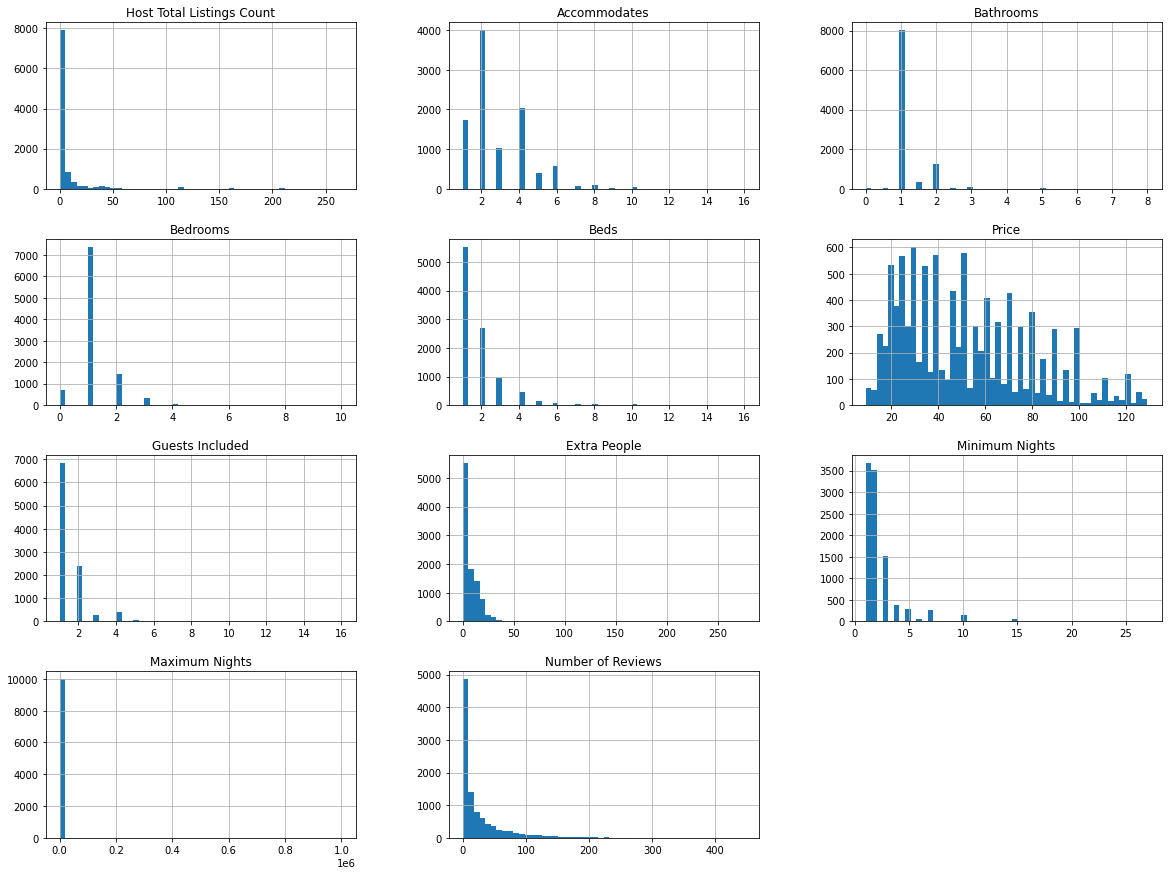

In [ ]:
df_regression.hist(bins=50, figsize=(20,15))

Ahora verémos la relación que tienen nuestras variables con el precio (nuestra variable objetivo):

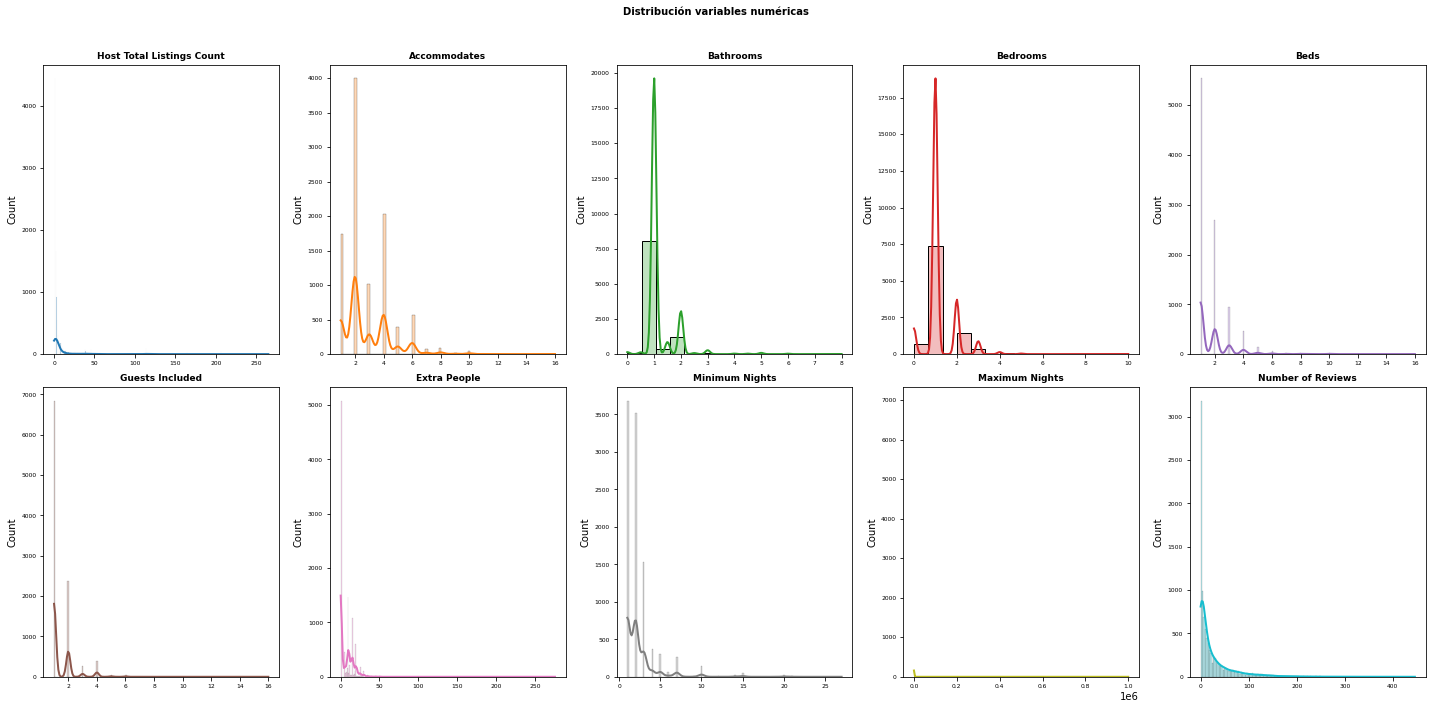

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flat
columnas_numeric = df_regression.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Price')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df_regression,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*3)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 9, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");


In [ ]:
#Con esta función podemos determinar aproximadamente dónde hacer los cortes de las variables númericas y nos servirá como refencia el limite superior
def outliers(dataout):
    median=dataout.median()
    p25 = dataout.quantile(0.25)
    p75 = dataout.quantile(0.75)
    iqr = p75 - p25
    li= p25 -1.5*iqr 
    ls= p75 +1.5*iqr
    lie=p25 -3*iqr 
    lse=p75 +3*iqr
    print("Rango Intercuartilico =",iqr) #Rango Intercuartilico
    print("Limite Inferior =",li)
    print("Limite Superior =",ls)
    print("Limite Inferior Extremo =",lie)
    print("Limite Superior Extremo =",lse)

In [ ]:
df_regression["Extra People"].value_counts()

0      5071
10     1422
15     1074
20      544
5       449
12      221
25      184
8       159
30      104
18      104
7        85
6        64
11       61
9        54
19       51
17       49
13       38
35       32
14       31
16       31
28       26
22       20
40       18
45       16
50       12
24       11
27        7
23        7
21        7
29        4
36        4
32        4
31        3
60        3
26        3
70        2
100       2
276       1
4         1
39        1
65        1
38        1
271       1
150       1
37        1
Name: Extra People, dtype: int64

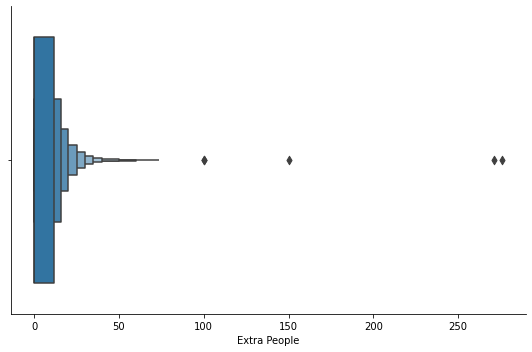

In [ ]:
sns.catplot(x = "Extra People", data = df_regression, kind = "boxen", aspect = 1.5);

In [ ]:
df_regression = df_regression[df_regression["Extra People"] < 29]

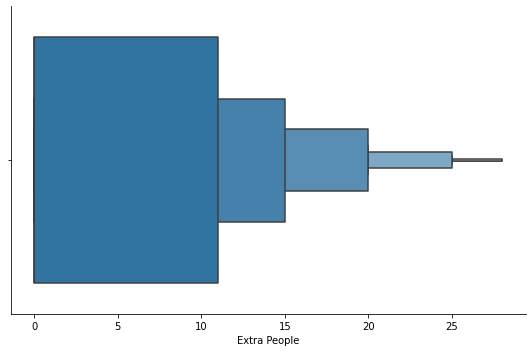

In [ ]:
sns.catplot(x = "Extra People", data = df_regression, kind = "boxen", aspect = 1.5);

In [ ]:
df_regression["Extra People"].value_counts()

0     5071
10    1422
15    1074
20     544
5      449
12     221
25     184
8      159
18     104
7       85
6       64
11      61
9       54
19      51
17      49
13      38
14      31
16      31
28      26
22      20
24      11
21       7
23       7
27       7
26       3
4        1
Name: Extra People, dtype: int64

In [ ]:
dataouts=df_regression["Extra People"]
outliers(dataouts)

Rango Intercuartilico = 11.0
Limite Inferior = -16.5
Limite Superior = 27.5
Limite Inferior Extremo = -33.0
Limite Superior Extremo = 44.0


In [ ]:
dataout=df_regression["Bedrooms"]
outliers(dataout)

Rango Intercuartilico = 0.0
Limite Inferior = 1.0
Limite Superior = 1.0
Limite Inferior Extremo = 1.0
Limite Superior Extremo = 1.0


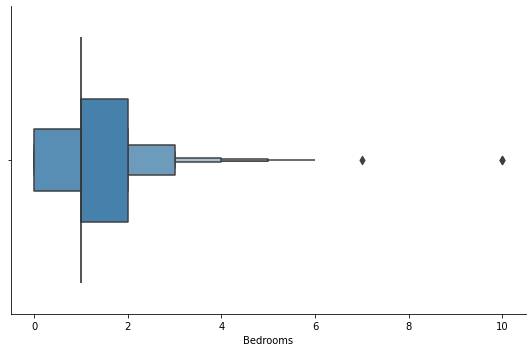

In [ ]:
sns.catplot(x = "Bedrooms", data = df_regression, kind = "boxen", aspect = 1.5);

In [ ]:
df_regression = df_regression[df_regression["Bedrooms"] < 6]

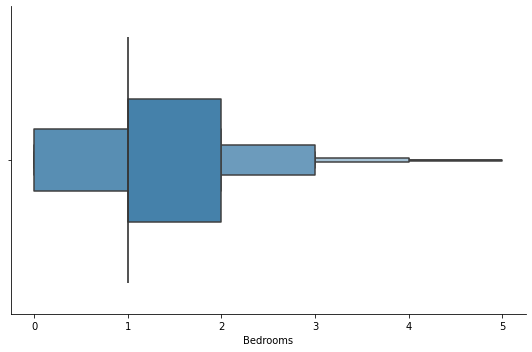

In [ ]:
sns.catplot(x = "Bedrooms", data = df_regression, kind = "boxen", aspect = 1.5);

In [ ]:
#veamos los posibles outliers de los baños
dataouts=df_regression["Bathrooms"]
outliers(dataouts)

Rango Intercuartilico = 0.0
Limite Inferior = 1.0
Limite Superior = 1.0
Limite Inferior Extremo = 1.0
Limite Superior Extremo = 1.0


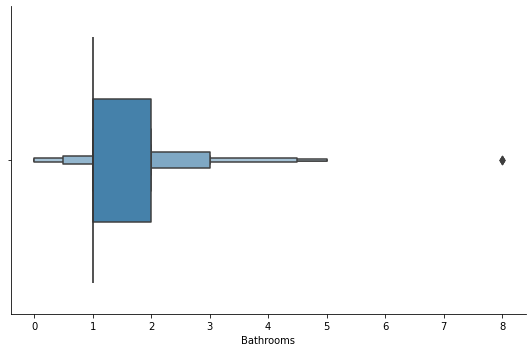

In [ ]:
sns.catplot(x = "Bathrooms", data = df_regression, kind = "boxen", aspect = 1.5);

In [ ]:
df_regression["Bathrooms"].value_counts()
#la mayoría de apartamento tiene 1 baños, pero en este caso quitaremos todos los que tengan menos de 3

1.0    7834
2.0    1224
1.5     343
3.0     112
0.0      56
0.5      53
5.0      34
2.5      29
4.0      14
4.5      14
8.0       3
Name: Bathrooms, dtype: int64

In [ ]:
#eliminaremos los apartamentos que tengan menos de 3  aunque podemos eliminar mas, preferimos mantener una posición conservadora 
df_regression = df_regression[df_regression['Bathrooms'] < 3]

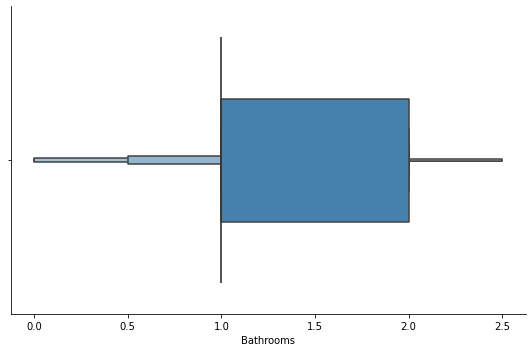

In [ ]:
sns.catplot(x = "Bathrooms", data = df_regression, kind = "boxen", aspect = 1.5);

In [ ]:
print(f'Dimensiones del dataset df_regression: {df_regression.shape}')

Dimensiones del dataset df_regression: (9539, 15)


En vista que aún las otras variables tienen Missing Values , a diferencia de nuestra variable Thumbnail Url éstos values pueden ser imputados, a continución lo procesarémos .

In [ ]:
cuantitativas=['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Host Total Listings Count']
for i in cuantitativas:
      i=df_regression[i].fillna(df_regression[i].mode()[0], inplace=True)

In [ ]:
#para ver porcentaje de missing values
((df_regression.isnull().sum()/df_regression.shape[0])*100).sort_values(ascending=False)

Thumbnail Url               0.0
Host Total Listings Count   0.0
Property Type               0.0
Room Type                   0.0
Accommodates                0.0
Bathrooms                   0.0
Bedrooms                    0.0
Beds                        0.0
Price                       0.0
Guests Included             0.0
Extra People                0.0
Minimum Nights              0.0
Maximum Nights              0.0
Number of Reviews           0.0
Cancellation Policy         0.0
dtype: float64

In [ ]:
df_regression.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9539 entries, 0 to 13994
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Thumbnail Url              9539 non-null   object 
 1   Host Total Listings Count  9539 non-null   float64
 2   Property Type              9539 non-null   object 
 3   Room Type                  9539 non-null   object 
 4   Accommodates               9539 non-null   int64  
 5   Bathrooms                  9539 non-null   float64
 6   Bedrooms                   9539 non-null   float64
 7   Beds                       9539 non-null   float64
 8   Price                      9539 non-null   float64
 9   Guests Included            9539 non-null   int64  
 10  Extra People               9539 non-null   int64  
 11  Minimum Nights             9539 non-null   int64  
 12  Maximum Nights             9539 non-null   int64  
 13  Number of Reviews          9539 non-null   int6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


Aquí vemos que ya no contamos con Missing Values

In [ ]:
df_regression.isnull().sum()

Thumbnail Url                0
Host Total Listings Count    0
Property Type                0
Room Type                    0
Accommodates                 0
Bathrooms                    0
Bedrooms                     0
Beds                         0
Price                        0
Guests Included              0
Extra People                 0
Minimum Nights               0
Maximum Nights               0
Number of Reviews            0
Cancellation Policy          0
dtype: int64

VARIABLES CUALITATIVAS

En el apartado anterior hicimos el análisis y procesamos los datos númericos, ahora llega el turno de las varibles cualitativas. En  la proximas celdas verémos las categorías que tiene nuestras variables 

In [ ]:
df_regression["Room Type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
df_regression["Room Type"].value_counts()

Entire home/apt    5041
Private room       4342
Shared room         156
Name: Room Type, dtype: int64

Considero pertinente quitar los outliners de Cancellation Policy y property type pues pienso que sobre todo en property type puede afectar el modelo ya que tiene muchos para ello usarémos la función que usan en la página que la profesora nos ha dado cómo muestra.

In [ ]:
df_regression["Cancellation Policy"].unique()

array(['flexible', 'strict', 'moderate', 'super_strict_60',
       'super_strict_30'], dtype=object)

In [ ]:
df_regression["Cancellation Policy"].value_counts()

strict             3299
flexible           3234
moderate           3003
super_strict_30       2
super_strict_60       1
Name: Cancellation Policy, dtype: int64

In [ ]:
from pandas.core.indexing import IndexSlice
Cancellation_Policy = df_regression["Cancellation Policy"].value_counts().keys().tolist()
counts = df_regression["Cancellation Policy"].value_counts().tolist()
	# se hace un bucle for para que itere sobre los valores únicos de property type y los cuente
for (Cancellation_Policy, count) in zip(Cancellation_Policy, counts):
  if count<3094:
    idxs=df_regression[df_regression["Cancellation Policy"]==Cancellation_Policy].index
    df_regression.drop(idxs, inplace=True)

In [ ]:
df_regression["Cancellation Policy"].value_counts()

strict      3299
flexible    3234
Name: Cancellation Policy, dtype: int64

In [ ]:
df_regression["Property Type"].unique()

array(['Apartment', 'Condominium', 'House', 'Bed & Breakfast', 'Other',
       'Hostel', 'Guesthouse', 'Loft', 'Chalet', 'Boutique hotel',
       'Guest suite', 'Dorm', 'Casa particular', 'Serviced apartment',
       'Tent', 'Townhouse', 'Earth House', 'Bungalow', 'Camper/RV',
       'Timeshare'], dtype=object)

Aquí podemos ver que existen tipos de propiedad que no tienen muchos valores lo que desbalancea nuestros datos y pueden representar problemas en la prédicción de los módelos, por eso he decidido eliminar aquellas propiedades con menos de 178 

In [ ]:
df_regression["Property Type"].value_counts() 

Apartment             5260
House                  527
Bed & Breakfast        206
Condominium            200
Loft                   124
Other                  109
Guesthouse              34
Dorm                    28
Chalet                  11
Hostel                   7
Townhouse                5
Boutique hotel           5
Serviced apartment       4
Earth House              3
Guest suite              3
Casa particular          3
Tent                     1
Bungalow                 1
Camper/RV                1
Timeshare                1
Name: Property Type, dtype: int64

In [ ]:
from pandas.core.indexing import IndexSlice
Property_Type = df_regression["Property Type"].value_counts().keys().tolist()
counts = df_regression["Property Type"].value_counts().tolist()
	# se hace un bucle for para que itere sobre los valores únicos de property type y los cuente
for (Property_Type, count) in zip(Property_Type, counts):
  if count<178:
    idxs=df_regression[df_regression["Property Type"]==Property_Type].index
    df_regression.drop(idxs, inplace=True) 


In [ ]:
df_regression["Property Type"].value_counts()

Apartment          5260
House               527
Bed & Breakfast     206
Condominium         200
Name: Property Type, dtype: int64

In [ ]:
df_regression

,Thumbnail Url,Host Total Listings Count,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Cancellation Policy
1,https://a0.muscache.com/im/pictures/3eb59287-8...,13.0,Apartment,Entire home/apt,4,1.0,1.0,2.0,50.0,2,25,1,1125,97,strict
4,https://a0.muscache.com/im/pictures/6136974/57...,1.0,Apartment,Entire home/apt,5,1.0,2.0,4.0,95.0,4,0,4,1125,72,strict
11,https://a0.muscache.com/im/pictures/85d08348-3...,1.0,Apartment,Private room,2,1.0,1.0,1.0,25.0,1,0,1,1125,0,flexible
15,https://a0.muscache.com/im/pictures/faa00251-5...,9.0,Condominium,Entire home/apt,2,1.0,1.0,2.0,45.0,1,8,2,1125,68,strict
16,https://a0.muscache.com/im/pictures/f22f1505-f...,1.0,Apartment,Private room,2,1.0,1.0,1.0,37.0,1,0,3,15,14,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13983,https://a0.muscache.com/im/pictures/503cf4fb-2...,1.0,Apartment,Entire home/apt,9,2.0,2.0,6.0,80.0,2,10,1,1125,17,strict
13986,https://a0.muscache.com/im/pictures/d7a3e438-3...,25.0,Apartment,Private room,4,1.0,1.0,3.0,36.0,2,28,1,1125,136,strict
13989,https://a0.muscache.com/im/pictures/c5d97dd0-b...,5.0,Apartment,Entire home/apt,4,1.0,1.0,1.0,80.0,2,5,2,1125,11,strict
13991,https://a0.muscache.com/im/pictures/98edec63-6...,2.0,Apartment,Entire home/apt,4,1.0,1.0,3.0,80.0,2,9,3,1125,85,flexible


Ahora cargaremos las imágenes en un array para tenerlas disponibles más adelante

In [ ]:
df_regression = df_regression.iloc[:1000]
df_regression.shape

(1000, 15)

In [ ]:
# aquí creamos nuestra estructura de datos, que va a consistir en la url de la
# imagen y un índice para saber donde insertarla en nuestro array
images_paths = [[i, img_url] for i, img_url in enumerate(df_regression['Thumbnail Url'])]



In [ ]:
# vamos a ver cómo ha quedado
images_paths[:5]

[[0,
  'https://a0.muscache.com/im/pictures/3eb59287-8b7c-42ff-95c7-8d00cbfd4c55.jpg?aki_policy=small'],
 [1,
  'https://a0.muscache.com/im/pictures/6136974/57d1a7e1_original.jpg?aki_policy=small'],
 [2,
  'https://a0.muscache.com/im/pictures/85d08348-3647-4247-9f87-62642ed783ed.jpg?aki_policy=small'],
 [3,
  'https://a0.muscache.com/im/pictures/faa00251-56ec-46e5-84a7-e7548161c2ac.jpg?aki_policy=small'],
 [4,
  'https://a0.muscache.com/im/pictures/f22f1505-f09b-41ed-abbe-787350e52923.jpg?aki_policy=small']]

In [ ]:
import imageio as io
import cv2

# esta es la función que se descargará la imagen y devolverá la imagen y el 
# índice indicando la posición donde se incrustará la imagen en nuestro array
def get_image(data_url, target_size=(224, 224)):
    idx, url = data_url
    try:
        img = io.imread(url)
        # hay alguna imagen en blanco y negro y daría error al incluirla en 
        # nuestro array de imagenes que tiene 3 canales, así que convertimos
        # todas las imágenes que tengan menos de 3 dimensiones a color
        if img.ndim < 3:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = cv2.resize(img, dsize=target_size)
        return img, idx
    except IOError as err:
        return (None, idx)

In [ ]:


import numpy as np

# en este array iremos incrustando las imágenes conforme las vayamos obteniendo
loaded_images = np.zeros((len(images_paths), 224, 224, 3), dtype=np.uint8)

# y en este array llevaremos un control de cuales se han cargado correctamente
# y cuales no
was_loaded = np.zeros(len(images_paths))



In [ ]:
print(loaded_images.shape)


(1000, 224, 224, 3)


Esto debimos hacerlo desde un principio, no obstante como se explicó anteriormente, lo hacemos luego de eliminar la mayor cantidad de variables posibles, debido a temas de memoria pues tarda mucho en importar y procesar .

In [ ]:


import concurrent
from tqdm import tqdm

# creamos un pool de procesos que se irán descargando las imágenes
# por defecto, se crearán tantos como CPUs tenga vuestra máquina
with concurrent.futures.ProcessPoolExecutor() as executor:
    # procesamos la lista de urls de imágenes paralelizandola con el pool de procesos
    for (img, idx) in tqdm(map(get_image, images_paths), total=len(images_paths)):
        # metemos la imagen en nuestro array
        if img is not None:
            if np.size(img,-1)==3:
                loaded_images[idx] = img
                was_loaded[idx] = 1
            else:
                was_loaded[idx] = 0
        else:
            was_loaded[idx] = 0

print('Terminado!')
print(f'Total de imágenes recuperadas correctamente: {sum(was_loaded)}/{len(images_paths)}')



100%|██████████| 1000/1000 [03:05<00:00,  5.40it/s]

Terminado!
Total de imágenes recuperadas correctamente: 998.0/1000


In [ ]:
# guardamos las imágenes (y yo os recomiendo que os lo guardéis en GDrive para evitar tener que repetir esto)
np.save('images.npy', loaded_images)
np.save('was_loaded.npy', was_loaded)

In [ ]:
# montamos GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# almacenamos las imagenes en nuestro drive
!cp images.npy /content/drive/MyDrive/images.npy
!cp was_loaded.npy /content/drive/MyDrive/was_loaded.npy

In [ ]:
data_imgs = df_regression[was_loaded == 1]

In [ ]:
!ls -lah images.npy was_loaded.npy

-rw-r--r-- 1 root root 144M Jun 17 18:23 images.npy
-rw-r--r-- 1 root root 8.0K Jun 17 18:23 was_loaded.npy


In [ ]:
data_imgs.shape

(998, 15)

In [ ]:
data_imgs


,Thumbnail Url,Host Total Listings Count,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Cancellation Policy
1,https://a0.muscache.com/im/pictures/3eb59287-8...,13.0,Apartment,Entire home/apt,4,1.0,1.0,2.0,50.0,2,25,1,1125,97,strict
4,https://a0.muscache.com/im/pictures/6136974/57...,1.0,Apartment,Entire home/apt,5,1.0,2.0,4.0,95.0,4,0,4,1125,72,strict
11,https://a0.muscache.com/im/pictures/85d08348-3...,1.0,Apartment,Private room,2,1.0,1.0,1.0,25.0,1,0,1,1125,0,flexible
15,https://a0.muscache.com/im/pictures/faa00251-5...,9.0,Condominium,Entire home/apt,2,1.0,1.0,2.0,45.0,1,8,2,1125,68,strict
16,https://a0.muscache.com/im/pictures/f22f1505-f...,1.0,Apartment,Private room,2,1.0,1.0,1.0,37.0,1,0,3,15,14,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,https://a0.muscache.com/im/pictures/7c96da79-5...,7.0,Apartment,Entire home/apt,5,1.5,2.0,3.0,90.0,2,15,4,90,23,strict
2238,https://a0.muscache.com/im/pictures/60869939/4...,2.0,Apartment,Entire home/apt,2,1.0,1.0,1.0,90.0,1,0,1,1125,63,strict
2239,https://a0.muscache.com/im/pictures/c839aef7-e...,1.0,Apartment,Private room,2,1.0,1.0,1.0,25.0,1,0,1,1125,1,strict
2240,https://a0.muscache.com/im/pictures/45244611/e...,5.0,Apartment,Entire home/apt,4,1.0,1.0,2.0,65.0,2,10,2,15,107,strict


In [ ]:
data_imgs.isnull().sum()

Thumbnail Url                0
Host Total Listings Count    0
Property Type                0
Room Type                    0
Accommodates                 0
Bathrooms                    0
Bedrooms                     0
Beds                         0
Price                        0
Guests Included              0
Extra People                 0
Minimum Nights               0
Maximum Nights               0
Number of Reviews            0
Cancellation Policy          0
dtype: int64

In [ ]:
data_imgs.dtypes

Thumbnail Url                 object
Host Total Listings Count    float64
Property Type                 object
Room Type                     object
Accommodates                   int64
Bathrooms                    float64
Bedrooms                     float64
Beds                         float64
Price                        float64
Guests Included                int64
Extra People                   int64
Minimum Nights                 int64
Maximum Nights                 int64
Number of Reviews              int64
Cancellation Policy           object
dtype: object

Vemos que todos los datos númericos no son homogéneos debido a que no tienen el mismo tipo, por ello con el uso de astype(), los transformamos todos a float para no tener problemas con nuestra red neuronal.

In [ ]:
data_imgs = data_imgs.astype({"Accommodates":'float',
                                "Guests Included":'float',
                                "Extra People":'float',
                                "Minimum Nights":'float',
                                "Maximum Nights":'float',
                                "Number of Reviews":'float',})

Ahora podemos comprobar que todos los tipos de datos de las variables númericas son los mismos.

In [ ]:
data_imgs.dtypes

Thumbnail Url                 object
Host Total Listings Count    float64
Property Type                 object
Room Type                     object
Accommodates                 float64
Bathrooms                    float64
Bedrooms                     float64
Beds                         float64
Price                        float64
Guests Included              float64
Extra People                 float64
Minimum Nights               float64
Maximum Nights               float64
Number of Reviews            float64
Cancellation Policy           object
dtype: object



---



---


*categorización**


---



---



---



In [ ]:
print('Columnas data: ', len(data_imgs.columns))
print('Filas  data : ', len(data_imgs.index))

Columnas data:  15
Filas  data :  998


In [ ]:
data_imgs.describe(include='O').T


,count,unique,top,freq
Thumbnail Url,998,998,https://a0.muscache.com/im/pictures/3eb59287-8...,1
Property Type,998,4,Apartment,852
Room Type,998,3,Entire home/apt,509
Cancellation Policy,998,2,strict,542


In [ ]:
data_imgs

,Thumbnail Url,Host Total Listings Count,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Cancellation Policy
1,https://a0.muscache.com/im/pictures/3eb59287-8...,13.0,Apartment,Entire home/apt,4.0,1.0,1.0,2.0,50.0,2.0,25.0,1.0,1125.0,97.0,strict
4,https://a0.muscache.com/im/pictures/6136974/57...,1.0,Apartment,Entire home/apt,5.0,1.0,2.0,4.0,95.0,4.0,0.0,4.0,1125.0,72.0,strict
11,https://a0.muscache.com/im/pictures/85d08348-3...,1.0,Apartment,Private room,2.0,1.0,1.0,1.0,25.0,1.0,0.0,1.0,1125.0,0.0,flexible
15,https://a0.muscache.com/im/pictures/faa00251-5...,9.0,Condominium,Entire home/apt,2.0,1.0,1.0,2.0,45.0,1.0,8.0,2.0,1125.0,68.0,strict
16,https://a0.muscache.com/im/pictures/f22f1505-f...,1.0,Apartment,Private room,2.0,1.0,1.0,1.0,37.0,1.0,0.0,3.0,15.0,14.0,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,https://a0.muscache.com/im/pictures/7c96da79-5...,7.0,Apartment,Entire home/apt,5.0,1.5,2.0,3.0,90.0,2.0,15.0,4.0,90.0,23.0,strict
2238,https://a0.muscache.com/im/pictures/60869939/4...,2.0,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,90.0,1.0,0.0,1.0,1125.0,63.0,strict
2239,https://a0.muscache.com/im/pictures/c839aef7-e...,1.0,Apartment,Private room,2.0,1.0,1.0,1.0,25.0,1.0,0.0,1.0,1125.0,1.0,strict
2240,https://a0.muscache.com/im/pictures/45244611/e...,5.0,Apartment,Entire home/apt,4.0,1.0,1.0,2.0,65.0,2.0,10.0,2.0,15.0,107.0,strict




---



---

---

**TRATAMIENTO VARIABLES CATEGORICAS**


---



---



---



---





In [ ]:
     # Creamos las variables binarias
PropertyType_dummies = pd.get_dummies(data_imgs['Property Type'], drop_first = False, prefix="Property Type")
RoomType_dummies = pd.get_dummies(data_imgs['Room Type'], drop_first = False, prefix="Room Type")
Cancellation_dummies = pd.get_dummies(data_imgs['Cancellation Policy'], drop_first = False, prefix="Cancellation Policy")

In [ ]:
PropertyType_dummies.sum()


Property Type_Apartment          852
Property Type_Bed & Breakfast     30
Property Type_Condominium         35
Property Type_House               81
dtype: int64

In [ ]:
RoomType_dummies.sum()

Room Type_Entire home/apt    509
Room Type_Private room       468
Room Type_Shared room         21
dtype: int64

In [ ]:
Cancellation_dummies.sum()

Cancellation Policy_flexible    456
Cancellation Policy_strict      542
dtype: int64

In [ ]:
df_imgsD=data_imgs

Data frame con categorización dummies

In [ ]:
df_imgsD

,Thumbnail Url,Host Total Listings Count,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Cancellation Policy
1,https://a0.muscache.com/im/pictures/3eb59287-8...,13.0,Apartment,Entire home/apt,4.0,1.0,1.0,2.0,50.0,2.0,25.0,1.0,1125.0,97.0,strict
4,https://a0.muscache.com/im/pictures/6136974/57...,1.0,Apartment,Entire home/apt,5.0,1.0,2.0,4.0,95.0,4.0,0.0,4.0,1125.0,72.0,strict
11,https://a0.muscache.com/im/pictures/85d08348-3...,1.0,Apartment,Private room,2.0,1.0,1.0,1.0,25.0,1.0,0.0,1.0,1125.0,0.0,flexible
15,https://a0.muscache.com/im/pictures/faa00251-5...,9.0,Condominium,Entire home/apt,2.0,1.0,1.0,2.0,45.0,1.0,8.0,2.0,1125.0,68.0,strict
16,https://a0.muscache.com/im/pictures/f22f1505-f...,1.0,Apartment,Private room,2.0,1.0,1.0,1.0,37.0,1.0,0.0,3.0,15.0,14.0,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,https://a0.muscache.com/im/pictures/7c96da79-5...,7.0,Apartment,Entire home/apt,5.0,1.5,2.0,3.0,90.0,2.0,15.0,4.0,90.0,23.0,strict
2238,https://a0.muscache.com/im/pictures/60869939/4...,2.0,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,90.0,1.0,0.0,1.0,1125.0,63.0,strict
2239,https://a0.muscache.com/im/pictures/c839aef7-e...,1.0,Apartment,Private room,2.0,1.0,1.0,1.0,25.0,1.0,0.0,1.0,1125.0,1.0,strict
2240,https://a0.muscache.com/im/pictures/45244611/e...,5.0,Apartment,Entire home/apt,4.0,1.0,1.0,2.0,65.0,2.0,10.0,2.0,15.0,107.0,strict


Concatenamos con los dataframes dummies para tener solo un dataframe llamado ***df_imgsD***

In [ ]:
df_imgsD=pd.concat([df_imgsD, PropertyType_dummies], axis = 1 )
df_imgsD=pd.concat([df_imgsD, RoomType_dummies ], axis = 1 )
df_imgsD=pd.concat([df_imgsD, Cancellation_dummies ], axis = 1 )

In [ ]:
df_imgsD.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Total Listings Count,998.0,8.6,24.6,0.0,1.0,2.0,5.0,207.0
Accommodates,998.0,2.8,1.6,1.0,2.0,2.0,4.0,10.0
Bathrooms,998.0,1.1,0.4,0.0,1.0,1.0,1.0,2.5
Bedrooms,998.0,1.1,0.6,0.0,1.0,1.0,1.0,5.0
Beds,998.0,1.7,1.1,1.0,1.0,1.0,2.0,10.0
Price,998.0,50.4,27.5,10.0,27.0,45.0,69.0,128.0
Guests Included,998.0,1.4,0.8,1.0,1.0,1.0,2.0,7.0
Extra People,998.0,6.0,7.5,0.0,0.0,0.0,10.0,28.0
Minimum Nights,998.0,2.4,2.5,1.0,1.0,2.0,3.0,25.0
Maximum Nights,998.0,861.6,548.0,1.0,365.0,1125.0,1125.0,10000.0


Borramos variables que ya no se usarán

In [ ]:
df_imgsD=df_imgsD.drop(['Thumbnail Url',"Property Type", "Room Type", "Cancellation Policy" ], axis=1)

In [ ]:
df_imgsD

,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Property Type_Apartment,Property Type_Bed & Breakfast,Property Type_Condominium,Property Type_House,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Cancellation Policy_flexible,Cancellation Policy_strict
1,13.0,4.0,1.0,1.0,2.0,50.0,2.0,25.0,1.0,1125.0,97.0,1,0,0,0,1,0,0,0,1
4,1.0,5.0,1.0,2.0,4.0,95.0,4.0,0.0,4.0,1125.0,72.0,1,0,0,0,1,0,0,0,1
11,1.0,2.0,1.0,1.0,1.0,25.0,1.0,0.0,1.0,1125.0,0.0,1,0,0,0,0,1,0,1,0
15,9.0,2.0,1.0,1.0,2.0,45.0,1.0,8.0,2.0,1125.0,68.0,0,0,1,0,1,0,0,0,1
16,1.0,2.0,1.0,1.0,1.0,37.0,1.0,0.0,3.0,15.0,14.0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,7.0,5.0,1.5,2.0,3.0,90.0,2.0,15.0,4.0,90.0,23.0,1,0,0,0,1,0,0,0,1
2238,2.0,2.0,1.0,1.0,1.0,90.0,1.0,0.0,1.0,1125.0,63.0,1,0,0,0,1,0,0,0,1
2239,1.0,2.0,1.0,1.0,1.0,25.0,1.0,0.0,1.0,1125.0,1.0,1,0,0,0,0,1,0,0,1
2240,5.0,4.0,1.0,1.0,2.0,65.0,2.0,10.0,2.0,15.0,107.0,1,0,0,0,1,0,0,0,1


con dtypes verificarémos los tipos de datos de las variables creadas, y de ser necesario las convertiremos a float

In [ ]:
df_imgsD.dtypes

Host Total Listings Count        float64
Accommodates                     float64
Bathrooms                        float64
Bedrooms                         float64
Beds                             float64
Price                            float64
Guests Included                  float64
Extra People                     float64
Minimum Nights                   float64
Maximum Nights                   float64
Number of Reviews                float64
Property Type_Apartment            uint8
Property Type_Bed & Breakfast      uint8
Property Type_Condominium          uint8
Property Type_House                uint8
Room Type_Entire home/apt          uint8
Room Type_Private room             uint8
Room Type_Shared room              uint8
Cancellation Policy_flexible       uint8
Cancellation Policy_strict         uint8
dtype: object

Convertimos a flota las features que no están en float

In [ ]:
df_imgsD = df_imgsD.astype({"Property Type_Apartment":'float',
                                "Property Type_Bed & Breakfast":'float',
                                "Property Type_Condominium":'float',
                                "Room Type_Entire home/apt":'float',
                                "Room Type_Private room":'float',
                                "Room Type_Shared room":'float',
                                "Cancellation Policy_flexible":'float',
                                "Cancellation Policy_strict":'float',
                                "Property Type_House":'float'})

In [ ]:
df_imgsD.dtypes

Host Total Listings Count        float64
Accommodates                     float64
Bathrooms                        float64
Bedrooms                         float64
Beds                             float64
Price                            float64
Guests Included                  float64
Extra People                     float64
Minimum Nights                   float64
Maximum Nights                   float64
Number of Reviews                float64
Property Type_Apartment          float64
Property Type_Bed & Breakfast    float64
Property Type_Condominium        float64
Property Type_House              float64
Room Type_Entire home/apt        float64
Room Type_Private room           float64
Room Type_Shared room            float64
Cancellation Policy_flexible     float64
Cancellation Policy_strict       float64
dtype: object



---



---


#AQUÍ INTENTÉ USAR EL ONE HOT ENCONDER Y  UNIR LOS DATA FRAMES GENERADOS ESTO DEBIDO A QUE HE INVESTIGADO QUE  LOS DATOS GENERADOS POR LAS VARIABLES DUMIES NO SON LO MÁS ADECUADOS, ASÍ QUE TRATÉ CON OHE NO ENTIENDO POR QUÉ AUMENTABAN MIS DATOS ASÍ QUE NO CONTINUÉ CON ESTO ###


In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.preprocessing import  OneHotEncoder

Generamos la variable one hot encoder (ohe) para cada variable que queremos transformar 

In [ ]:
oheProperty=OneHotEncoder()
oheRoom=OneHotEncoder()
oheCancellation=OneHotEncoder()
print(oheProperty,oheRoom,oheCancellation)

OneHotEncoder() OneHotEncoder() OneHotEncoder()


In [ ]:
Property_array=oheProperty.fit_transform(data_imgs[["Property Type"]]).toarray()

In [ ]:
Property_array

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [ ]:
RoomType_array=oheRoom.fit_transform(data_imgs[["Room Type"]]).toarray()

In [ ]:
CancellationPolicy_array=oheCancellation.fit_transform(data_imgs[["Cancellation Policy"]]).toarray()

In [ ]:
print(Property_array)
print(RoomType_array)
print(CancellationPolicy_array)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
print(oheProperty.categories_)
print(oheRoom.categories_)
print(oheCancellation.categories_)

[array(['Apartment', 'Bed & Breakfast', 'Condominium', 'House'],
      dtype=object)]
[array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)]
[array(['flexible', 'strict'], dtype=object)]


Creamos dataframes para cada categoría , usando el fit del one hot y las categorías creadas

In [ ]:
df_Cancelationd=pd.DataFrame(CancellationPolicy_array, columns=oheCancellation.categories_)
df_RoomType_array=pd.DataFrame(RoomType_array, columns=oheRoom.categories_)
df_PropertyType_array=pd.DataFrame(Property_array, columns=oheProperty.categories_)

Veamos las datos del data frame generados

In [ ]:
print(df_Cancelationd)

    flexible strict
0        0.0    1.0
1        0.0    1.0
2        1.0    0.0
3        0.0    1.0
4        0.0    1.0
..       ...    ...
993      0.0    1.0
994      0.0    1.0
995      0.0    1.0
996      0.0    1.0
997      0.0    1.0

[998 rows x 2 columns]


In [ ]:
print(df_RoomType_array)

    Entire home/apt Private room Shared room
0               1.0          0.0         0.0
1               1.0          0.0         0.0
2               0.0          1.0         0.0
3               1.0          0.0         0.0
4               0.0          1.0         0.0
..              ...          ...         ...
993             1.0          0.0         0.0
994             1.0          0.0         0.0
995             0.0          1.0         0.0
996             1.0          0.0         0.0
997             1.0          0.0         0.0

[998 rows x 3 columns]


In [ ]:
print(df_PropertyType_array)

    Apartment Bed & Breakfast Condominium House
0         1.0             0.0         0.0   0.0
1         1.0             0.0         0.0   0.0
2         1.0             0.0         0.0   0.0
3         0.0             0.0         1.0   0.0
4         1.0             0.0         0.0   0.0
..        ...             ...         ...   ...
993       1.0             0.0         0.0   0.0
994       1.0             0.0         0.0   0.0
995       1.0             0.0         0.0   0.0
996       1.0             0.0         0.0   0.0
997       1.0             0.0         0.0   0.0

[998 rows x 4 columns]


Como quiero probar label encoder o dummie es mejor, pues he dicidio hacer otro DF donde se concatenen los DF generados por el ONE HOT ,
Ahora adicionaremos los dataframes anteriores a nustro data frame

PODEMOS VER QUE HASTA AQUÍ TENÍA LOS MISMOS DATOS ...... PERO LUEGO DE CONCATENAR ...:(

In [ ]:
df_imgsH=data_imgs

In [ ]:
df_imgsH

,Thumbnail Url,Host Total Listings Count,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Cancellation Policy
1,https://a0.muscache.com/im/pictures/3eb59287-8...,13.0,Apartment,Entire home/apt,4.0,1.0,1.0,2.0,50.0,2.0,25.0,1.0,1125.0,97.0,strict
4,https://a0.muscache.com/im/pictures/6136974/57...,1.0,Apartment,Entire home/apt,5.0,1.0,2.0,4.0,95.0,4.0,0.0,4.0,1125.0,72.0,strict
11,https://a0.muscache.com/im/pictures/85d08348-3...,1.0,Apartment,Private room,2.0,1.0,1.0,1.0,25.0,1.0,0.0,1.0,1125.0,0.0,flexible
15,https://a0.muscache.com/im/pictures/faa00251-5...,9.0,Condominium,Entire home/apt,2.0,1.0,1.0,2.0,45.0,1.0,8.0,2.0,1125.0,68.0,strict
16,https://a0.muscache.com/im/pictures/f22f1505-f...,1.0,Apartment,Private room,2.0,1.0,1.0,1.0,37.0,1.0,0.0,3.0,15.0,14.0,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,https://a0.muscache.com/im/pictures/7c96da79-5...,7.0,Apartment,Entire home/apt,5.0,1.5,2.0,3.0,90.0,2.0,15.0,4.0,90.0,23.0,strict
2238,https://a0.muscache.com/im/pictures/60869939/4...,2.0,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,90.0,1.0,0.0,1.0,1125.0,63.0,strict
2239,https://a0.muscache.com/im/pictures/c839aef7-e...,1.0,Apartment,Private room,2.0,1.0,1.0,1.0,25.0,1.0,0.0,1.0,1125.0,1.0,strict
2240,https://a0.muscache.com/im/pictures/45244611/e...,5.0,Apartment,Entire home/apt,4.0,1.0,1.0,2.0,65.0,2.0,10.0,2.0,15.0,107.0,strict


In [ ]:
df_imgsH=pd.concat([df_imgsH, df_Cancelationd ], axis = 1 )
df_imgsH=pd.concat([df_imgsH, df_RoomType_array], axis = 1)
df_imgsH=pd.concat([df_imgsH, df_PropertyType_array], axis = 1)


In [ ]:
df_imgsH.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Thumbnail Url  Host Total Listings Count  Property Type  Room Type  \
0              True                       True           True       True   
1             False                      False          False      False   
2              True                       True           True       True   
3              True                       True           True       True   
4             False                      False          False      False   
...             ...                        ...            ...        ...   
2235          False                      False          False      False   
2238          False                      False          False      False   
2239          False                      False          False      False   
2240          False                      False          False      False   
2241          False                      False          False      False   

      Accommodates  Bathr

CON EL AYUDA DE UN COMPAÑERO SE PUDO HACER ESTO PARA LA CODIFICACIÓN DE VARIABLES.



Generamos un data frame llamado df_imagsC donde estarán todas las variables categorícas y numericas, se eliminará la variable donde están todas las imágenes, y la columna precio.

In [ ]:
df_imgsX=data_imgs

In [ ]:
df_imgsX.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Total Listings Count,998.0,8.6,24.6,0.0,1.0,2.0,5.0,207.0
Accommodates,998.0,2.8,1.6,1.0,2.0,2.0,4.0,10.0
Bathrooms,998.0,1.1,0.4,0.0,1.0,1.0,1.0,2.5
Bedrooms,998.0,1.1,0.6,0.0,1.0,1.0,1.0,5.0
Beds,998.0,1.7,1.1,1.0,1.0,1.0,2.0,10.0
Price,998.0,50.4,27.5,10.0,27.0,45.0,69.0,128.0
Guests Included,998.0,1.4,0.8,1.0,1.0,1.0,2.0,7.0
Extra People,998.0,6.0,7.5,0.0,0.0,0.0,10.0,28.0
Minimum Nights,998.0,2.4,2.5,1.0,1.0,2.0,3.0,25.0
Maximum Nights,998.0,861.6,548.0,1.0,365.0,1125.0,1125.0,10000.0


In [ ]:
#Vamos a categorizar las variables de tipo object
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
df_imgsX=data_imgs
label_encoder = LabelEncoder()
df_imgsX["Cancellation Policy"] = label_encoder.fit_transform(df_imgsX["Cancellation Policy"])
df_imgsX["Property Type"] = label_encoder.fit_transform(df_imgsX["Property Type"])
df_imgsX["Room Type"] = label_encoder.fit_transform(df_imgsX["Room Type"])

df_imgsX["Cancellation Policy"]=to_categorical(df_imgsX["Cancellation Policy"])
df_imgsX["Property Type"]=to_categorical(df_imgsX["Property Type"])
df_imgsX["Room Type"]=to_categorical(df_imgsX["Room Type"])

In [ ]:
df_imgsX

,Thumbnail Url,Host Total Listings Count,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Cancellation Policy
1,https://a0.muscache.com/im/pictures/3eb59287-8...,13.0,1.0,1.0,4.0,1.0,1.0,2.0,50.0,2.0,25.0,1.0,1125.0,97.0,0.0
4,https://a0.muscache.com/im/pictures/6136974/57...,1.0,1.0,1.0,5.0,1.0,2.0,4.0,95.0,4.0,0.0,4.0,1125.0,72.0,0.0
11,https://a0.muscache.com/im/pictures/85d08348-3...,1.0,1.0,0.0,2.0,1.0,1.0,1.0,25.0,1.0,0.0,1.0,1125.0,0.0,1.0
15,https://a0.muscache.com/im/pictures/faa00251-5...,9.0,0.0,1.0,2.0,1.0,1.0,2.0,45.0,1.0,8.0,2.0,1125.0,68.0,0.0
16,https://a0.muscache.com/im/pictures/f22f1505-f...,1.0,1.0,0.0,2.0,1.0,1.0,1.0,37.0,1.0,0.0,3.0,15.0,14.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,https://a0.muscache.com/im/pictures/7c96da79-5...,7.0,1.0,1.0,5.0,1.5,2.0,3.0,90.0,2.0,15.0,4.0,90.0,23.0,0.0
2238,https://a0.muscache.com/im/pictures/60869939/4...,2.0,1.0,1.0,2.0,1.0,1.0,1.0,90.0,1.0,0.0,1.0,1125.0,63.0,0.0
2239,https://a0.muscache.com/im/pictures/c839aef7-e...,1.0,1.0,0.0,2.0,1.0,1.0,1.0,25.0,1.0,0.0,1.0,1125.0,1.0,0.0
2240,https://a0.muscache.com/im/pictures/45244611/e...,5.0,1.0,1.0,4.0,1.0,1.0,2.0,65.0,2.0,10.0,2.0,15.0,107.0,0.0


In [ ]:
df_imgsX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 1 to 2241
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Thumbnail Url              998 non-null    object 
 1   Host Total Listings Count  998 non-null    float64
 2   Property Type              998 non-null    float32
 3   Room Type                  998 non-null    float32
 4   Accommodates               998 non-null    float64
 5   Bathrooms                  998 non-null    float64
 6   Bedrooms                   998 non-null    float64
 7   Beds                       998 non-null    float64
 8   Price                      998 non-null    float64
 9   Guests Included            998 non-null    float64
 10  Extra People               998 non-null    float64
 11  Minimum Nights             998 non-null    float64
 12  Maximum Nights             998 non-null    float64
 13  Number of Reviews          998 non-null    float6

In [ ]:
df_imgsX=df_imgsX.drop(['Thumbnail Url'], axis=1)

Aquí podemos ver que todos los tipos de datos ahora son iguales.

In [ ]:
df_imgsX.columns

Index(['Host Total Listings Count', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Cancellation Policy'],
      dtype='object')

In [ ]:
df_imgsX = df_imgsX.astype({"Property Type":'float',
                                "Room Type":'float',
                                "Cancellation Policy":'float'})

In [ ]:
df_imgsX.dtypes

Host Total Listings Count    float64
Property Type                float64
Room Type                    float64
Accommodates                 float64
Bathrooms                    float64
Bedrooms                     float64
Beds                         float64
Price                        float64
Guests Included              float64
Extra People                 float64
Minimum Nights               float64
Maximum Nights               float64
Number of Reviews            float64
Cancellation Policy          float64
dtype: object



---

 **NORMALIZACIÓN Y ESCALADO DE DATOS**


---


 Es importante tener en cuenta que a pesar que la normalización debe hacerse luego de la separación de los datos en train y test, en esta práctica lo haremos después, esto obedece a que nuestra variable objetivo ("precio") debe ir normalizado, no obstante cuando intenté normalizarla no pude, solo pude normalizar el train y el y_test-


---



Usaremos el min max scaler, por lo general es la primera opción para un escalamiento, con un rango default de 01 , para ello crearemos un crearemos el escalador y con el fit transform del los siguientes data frames:

df_imgsX ===> que es el que contiene la segunda forma en la que se hizo el encoder(labelEncoder+toCategorice

df_imgsD==> DF que tiene las variables dummies.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [ ]:
sc=MinMaxScaler()
scalerD= sc.fit_transform(df_imgsD)

In [ ]:
scalerD

array([[0.06280193, 0.33333333, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.00483092, 0.44444444, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.00483092, 0.11111111, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.00483092, 0.11111111, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.02415459, 0.33333333, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.0531401 , 0.44444444, 0.8       , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
df_scalerDframe= pd.DataFrame(scalerD, columns=df_imgsD.columns)

In [ ]:
#dataframe Dummie normalizado 
df_scalerDframe.columns

Index(['Host Total Listings Count', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Price', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Number of Reviews', 'Property Type_Apartment',
       'Property Type_Bed & Breakfast', 'Property Type_Condominium',
       'Property Type_House', 'Room Type_Entire home/apt',
       'Room Type_Private room', 'Room Type_Shared room',
       'Cancellation Policy_flexible', 'Cancellation Policy_strict'],
      dtype='object')

In [ ]:
#las variables para trainDummie
featuresDummies = df_scalerDframe[['Host Total Listings Count', 'Accommodates', 'Bathrooms', 'Bedrooms','Beds', 'Guests Included', 'Extra People', 'Minimum Nights','Maximum Nights'
                        , 'Number of Reviews',
                          'Property Type_Apartment',
                          'Property Type_Bed & Breakfast', 'Property Type_Condominium',
                          'Property Type_House', 'Room Type_Entire home/apt',
                          'Room Type_Private room', 'Room Type_Shared room',
                          'Cancellation Policy_flexible', 'Cancellation Policy_strict']]
                
featuresDummies.columns

Index(['Host Total Listings Count', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Number of Reviews', 'Property Type_Apartment',
       'Property Type_Bed & Breakfast', 'Property Type_Condominium',
       'Property Type_House', 'Room Type_Entire home/apt',
       'Room Type_Private room', 'Room Type_Shared room',
       'Cancellation Policy_flexible', 'Cancellation Policy_strict'],
      dtype='object')

In [ ]:
#nuestra variable objeto de Ydummies
Yd=df_scalerDframe.iloc[:,5]

In [ ]:
Xd=featuresDummies

In [ ]:
Xd

,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Property Type_Apartment,Property Type_Bed & Breakfast,Property Type_Condominium,Property Type_House,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Cancellation Policy_flexible,Cancellation Policy_strict
0,0.1,0.3,0.4,0.2,0.1,0.2,0.9,0.0,0.1,0.3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.4,0.4,0.4,0.3,0.5,0.0,0.1,0.1,0.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.1,0.4,0.2,0.0,0.0,0.0,0.0,0.1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.1,0.4,0.2,0.1,0.0,0.3,0.0,0.1,0.2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.1,0.4,0.2,0.0,0.0,0.0,0.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.0,0.4,0.6,0.4,0.2,0.2,0.5,0.1,0.0,0.1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
994,0.0,0.1,0.4,0.2,0.0,0.0,0.0,0.0,0.1,0.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
995,0.0,0.1,0.4,0.2,0.0,0.0,0.0,0.0,0.1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
996,0.0,0.3,0.4,0.2,0.1,0.2,0.4,0.0,0.0,0.3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0




---



---



---


**DIVISIÓN TRAIN Y TEST DUMMIES**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

X_traind, X_testd, y_traind, y_testd = train_test_split (Xd,Yd, test_size=0.2, random_state=1)
X_traind, X_validationd,  y_traind , y_validationd= train_test_split (X_traind,y_traind, test_size=0.25, random_state=1)

In [ ]:
print("Datos original con Dummies",df_imgsD.shape)
print("Datos de entrenamiento X_traind",X_traind.shape)
print("Datos de entrenamiento y_traind",y_traind.shape)
print("Datos de validación X_validationd",X_validationd.shape)
print("Datos de Validación y_validationd",y_validationd.shape)
print("Datos de prueba x_testd",X_testd.shape)
print("Datos de prueba y_testd",y_testd.shape)


Datos original con Dummies (998, 20)
Datos de entrenamiento X_traind (598, 19)
Datos de entrenamiento y_traind (598,)
Datos de validación X_validationd (200, 19)
Datos de Validación y_validationd (200,)
Datos de prueba x_testd (200, 19)
Datos de prueba y_testd (200,)




---



---



---



Escalamos el DF de label and coder y categorical

In [ ]:
scalerX= sc.fit_transform(df_imgsX)

In [ ]:
df_scalerXframe= pd.DataFrame(scalerX, columns=df_imgsX.columns)

In [ ]:
#DF label enconder normalizado
df_scalerXframe

,Host Total Listings Count,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Cancellation Policy
0,0.1,1.0,1.0,0.3,0.4,0.2,0.1,0.3,0.2,0.9,0.0,0.1,0.3,0.0
1,0.0,1.0,1.0,0.4,0.4,0.4,0.3,0.7,0.5,0.0,0.1,0.1,0.2,0.0
2,0.0,1.0,0.0,0.1,0.4,0.2,0.0,0.1,0.0,0.0,0.0,0.1,0.0,1.0
3,0.0,0.0,1.0,0.1,0.4,0.2,0.1,0.3,0.0,0.3,0.0,0.1,0.2,0.0
4,0.0,1.0,0.0,0.1,0.4,0.2,0.0,0.2,0.0,0.0,0.1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.0,1.0,1.0,0.4,0.6,0.4,0.2,0.7,0.2,0.5,0.1,0.0,0.1,0.0
994,0.0,1.0,1.0,0.1,0.4,0.2,0.0,0.7,0.0,0.0,0.0,0.1,0.2,0.0
995,0.0,1.0,0.0,0.1,0.4,0.2,0.0,0.1,0.0,0.0,0.0,0.1,0.0,0.0
996,0.0,1.0,1.0,0.3,0.4,0.2,0.1,0.5,0.2,0.4,0.0,0.0,0.3,0.0


In [ ]:
#nuestra variable objeto "precio del df con labelencoder
Y=df_scalerXframe.iloc[:,7]

In [ ]:
featuresX = df_scalerXframe[["Host Total Listings Count", 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Cancellation Policy']]
featuresX.columns

Index(['Host Total Listings Count', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Number of Reviews',
       'Cancellation Policy'],
      dtype='object')

In [ ]:
X=featuresX



---



---
**DIVISIÓN TRAIN Y TEST**


---


---



---





In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test = train_test_split (X,Y, test_size=0.2, random_state=1)
X_train, X_validation,  y_train , y_validation= train_test_split (X_train,y_train, test_size=0.25, random_state=42)
 


In [ ]:
print("Datos original con Label",df_imgsX.shape)
print("Datos de entrenamiento X_traind",X_train.shape)
print("Datos de entrenamiento y_traind",y_train.shape)
print("Datos de validación X_validationd",X_validation.shape)
print("Datos de Validación y_validationd",y_validation.shape)
print("Datos de prueba x_testd",X_test.shape)
print("Datos de prueba y_testd",y_test.shape)


Datos original con Label (998, 14)
Datos de entrenamiento X_traind (598, 13)
Datos de entrenamiento y_traind (598,)
Datos de validación X_validationd (200, 13)
Datos de Validación y_validationd (200,)
Datos de prueba x_testd (200, 13)
Datos de prueba y_testd (200,)


**VAMOS A QUEDARNOS CON LOS MIL DATOS**

Construimos el módelo

In [ ]:
import keras as kr
import keras.backend as kb
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


Por la poca cantidad de datos no queremos que sea una red neuronal muy compleja, las neuronas son extraidas de un lista llamada nn. 

**Capas** Pensamos que solo dos son suficientes para no generar mayor profundidad, más una capa de salida.

**Neuronas** Hemos usado  4 en primera capa, dos en la capa intermedia y una en la capa de salida, concideramos que entre más simple mejores resultados para evitar overfitting.
**Learning Rate=lr** hemos usado uno no muy pequeño pero eso lo compensaremos con una mayor cantidad de epocas.
**Función de activación** Usamos dos la relu para la capa de entrada, y la capa oculta 
**Iniciación de pesos** decidimos usar Glorot Unimorm, tambi{en llamdo Javier, porque con este inicializador los pesos se asignad a partir de una distribución uniforme y es adecuada pra capas con activación Relu, que permite dejar los valores positivos, en nuestra ultima capa usamos Activación Linear. porque nuestro problema es de regresión. "calcular el Precio"
**Función de Perdidas** debido a que nuestro problema es de regresión elegimos el -mean squared error- **"mse"**.


In [ ]:
lr=0.01
#Numero de neuronas por capa
nn=[1,2,4, 8, 16, 36]
model=kr.Sequential()
#optimizamos la red
optimizer=tf.keras.optimizers.RMSprop(lr)

#en este modelo la capa se conecta con la capa anterior y tenemos una función de activación relu 

#Capa1
                                                                               
model.add(kr.layers.Dense(nn[2],activation='relu', input_dim=X_train.shape[1],  kernel_initializer =  tf.keras.initializers.GlorotUniform()))
#Capa2
model.add(kr.layers.Dense(nn[1], activation="relu", kernel_initializer =  tf.keras.initializers.GlorotUniform()))
#Capa3-- como es la capa de salida usaremos la activación Sigmoide para que el output quede dentro de los valores[0y1]
model.add(kr.layers.Dense(nn[0],activation="linear"))


#Compilamos el modelo Función de coste,optimizador,metricas, nestra función de perdidas será el min score error (error cuadratico médio) usamos como optimizador el Desenso del Gradiente 
model.compile(loss='mse',metrics=['mean_absolute_error', "mean_squared_error", "accuracy"])

#con model. Fit para entrenamos los datos de entrada con la salida con una iteración de 
#como epochs
H=model.fit(X_train,y_train,validation_data=(X_validation, y_validation),epochs=200)



Epoch 1/200
19/19 [==============================] - 1s 13ms/step - loss: 0.1717 - mean_absolute_error: 0.3370 - mean_squared_error: 0.1717 - accuracy: 0.0000e+00 - val_loss: 0.1629 - val_mean_absolute_error: 0.3290 - val_mean_squared_error: 0.1629 - val_accuracy: 0.0050
Epoch 2/200
19/19 [==============================] - 0s 3ms/step - loss: 0.1532 - mean_absolute_error: 0.3121 - mean_squared_error: 0.1532 - accuracy: 0.0000e+00 - val_loss: 0.1468 - val_mean_absolute_error: 0.3072 - val_mean_squared_error: 0.1468 - val_accuracy: 0.0050
Epoch 3/200
19/19 [==============================] - 0s 4ms/step - loss: 0.1402 - mean_absolute_error: 0.2935 - mean_squared_error: 0.1402 - accuracy: 0.0000e+00 - val_loss: 0.1343 - val_mean_absolute_error: 0.2888 - val_mean_squared_error: 0.1343 - val_accuracy: 0.0050
Epoch 4/200
19/19 [==============================] - 0s 4ms/step - loss: 0.1292 - mean_absolute_error: 0.2768 - mean_squared_error: 0.1292 - accuracy: 0.0000e+00 - val_loss: 0.1239 - val

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
diferencia=y_pred.flatten()-y_test
print("La diferencia es\n", diferencia)
porcentajedif=(diferencia/y_test)*100
absPercentdiferencia=np.abs(porcentajedif)

La diferencia es
 358    0.0
607    0.2
810    0.0
918   -0.1
242    0.2
      ... 
429    0.3
889    0.1
577   -0.4
654    0.1
207    0.3
Name: Price, Length: 200, dtype: float64


In [ ]:
import locale
import os
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentdiferencia)
std = np.std(absPercentdiferencia)
# finally, show some statistics on our model
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] avg. Airbnb price: {}, std Aitbnprice: {}".format(
	locale.currency(df_imgsX["Price"].mean(), grouping=True),
	locale.currency(df_imgsX["Price"].std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

[INFO] avg. Airbnb price: $50.39, std Aitbnprice: $27.49
[INFO] mean: inf%, std: nan%


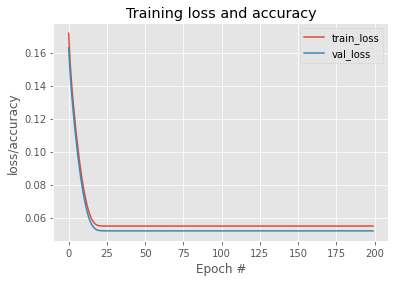

In [ ]:
#ahora veamos la gráfica de accuracy
plt.style.use("ggplot")
plt.figure
plt.plot(np.arange(0, 200), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 200), H.history["val_loss"], label="val_loss")

plt.title("Training loss and accuracy")
plt.xlabel("Epoch #")
plt.ylabel("loss/accuracy")
plt.legend()




Con la gráfica vemos que no existe overfitting lo que quiere decir que el loss va bajando a medida que el accuracy mejora y que no hay mucha diferencia, podríamos decir que nuestro módelo tiene una buena generalización. 



---



---

#REDES CONVOLUCIONALES ###

En este apartado analizaremos imagenes por esta razón nuestra red neuronal usaremos un entrenamiento supervizado, al igual que nuestra red anterior, para ello usaremos las redes convolucionales, de forma tal que los pesos y bias se vayan actualizando, en esta red definimos un Kernel con pocos filtros y un damaño de 3x3.
he decidido usar solo una capa que sera convolucional, con una función de activación relu, 
incluimos una capa de Maxpooling para reducir el tamaño de las capas de activación
**CORRECCIÓN DE OVERFITTING**
Para corregir overfitting en la clasificación lugar de un flatten usamos un Globalaveragepooling para reducir el numero de variables al calcular la media de los elementos; y también empleamos la regularización Lasso L2 penalizando así los pesos dispares y que las neuronas pesen más o menos igual y use todas las neuronas para normalizar, así como también incluimos Dropout para la desconexion de neuronas.

Para la clasificación usamos dos capas densas o fully connected con una con activación relu y la otra con linear.

In [ ]:
#CARGAMOS NUESTROS DATOS
images_new= loaded_images[was_loaded==1,:,:,:]

In [ ]:
images_new.shape

(998, 224, 224, 3)

**IMPORTAMOS NUESTAS LIBRERIAS**

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from tensorflow.keras.layers import  Dropout, BatchNormalization, Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Convolution2D as Conv2D

from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
X1=images_new/255

In [ ]:
X1.shape

(998, 224, 224, 3)

In [ ]:
Y

0     0.3
1     0.7
2     0.1
3     0.3
4     0.2
       ..
993   0.7
994   0.7
995   0.1
996   0.5
997   0.7
Name: Price, Length: 998, dtype: float64

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
X_trainn, X_testn, y_trainn, y_testn = train_test_split (X1,Y, test_size=0.2, random_state=42)
X_trainn, X_validationn,  y_trainn , y_validationn= train_test_split (X_trainn,y_trainn, test_size=0.1, random_state=42)


In [ ]:
print("Datos original con Label",images_new.shape)
print("Datos de entrenamiento X_traind",X_trainn.shape)
print("Datos de entrenamiento y_traind",y_trainn.shape)
print("Datos de validación X_validationd",X_validationn.shape)
print("Datos de Validación y_validationd",y_validationn.shape)
print("Datos de prueba x_testd",x_testn.shape)
print("Datos de prueba y_testd",y_testn.shape)


Datos original con Label (998, 224, 224, 3)
Datos de entrenamiento X_traind (718, 224, 224, 3)
Datos de entrenamiento y_traind (718,)
Datos de validación X_validationd (80, 224, 224, 3)
Datos de Validación y_validationd (80,)
Datos de prueba x_testd (798,)
Datos de prueba y_testd (200,)


In [ ]:
#vamos a inicializar el modelo: Sequential  
model = Sequential()

 

#Definimos nuestra primera capa convolucional 
#tenemos 128 capas convolucinales, con un kernel impar y una función de activación
model.add(Conv2D(filters=32, kernel_size=(3,3), activation=("relu"), input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))



#añadimos el clasificador 
model.add(GlobalAveragePooling2D())
model.add(Dense(12, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation="linear"))

#compilamos nuestro modelo 
model.compile(loss="MSE", 
             # optimizer=Adam(lr=0.0001, decay=10e-6), metrics=["accuracy"])
             optimizer=Adam(lr=1e-3, decay=1e-3), metrics=["accuracy"])

model.summary()


M=model.fit(X_trainn, to_categorical(y_trainn), 
          batch_size=128, shuffle=True, epochs=10,validation_data=(X_testn, to_categorical(y_testn)))








Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 111, 111, 32)      0         
                                                                 
 global_average_pooling2d_10  (None, 32)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_38 (Dense)            (None, 12)                396       
                                                                 
 dense_39 (Dense)            (None, 1)               

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
6/6 [==============================] - 12s 2s/step - loss: 1.0485 - accuracy: 0.0000e+00 - val_loss: 0.9051 - val_accuracy: 0.0000e+00
Epoch 2/10
6/6 [==============================] - 11s 2s/step - loss: 0.8505 - accuracy: 0.0000e+00 - val_loss: 0.7659 - val_accuracy: 0.0000e+00
Epoch 3/10
6/6 [==============================] - 11s 2s/step - loss: 0.7050 - accuracy: 0.0000e+00 - val_loss: 0.6172 - val_accuracy: 0.0000e+00
Epoch 4/10
6/6 [==============================] - 11s 2s/step - loss: 0.5579 - accuracy: 0.0585 - val_loss: 0.4761 - val_accuracy: 0.2650
Epoch 5/10
6/6 [==============================] - 11s 2s/step - loss: 0.4227 - accuracy: 0.4401 - val_loss: 0.3531 - val_accuracy: 0.6850
Epoch 6/10
6/6 [==============================] - 11s 2s/step - loss: 0.3102 - accuracy: 0.7730 - val_loss: 0.2578 - val_accuracy: 0.9100
Epoch 7/10
6/6 [==============================] - 11s 2s/step - loss: 0.2292 - accuracy: 0.9443 - val_loss: 0.1974 - val_accuracy: 0.9700
Epoch 8/10

In [ ]:
scores=model.evaluate(X_testn,to_categorical(y_testn))

7/7 [==============================] - 1s 103ms/step - loss: 0.1611 - accuracy: 0.9900


In [ ]:
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Loss: 0.161
Accuracy: 0.990


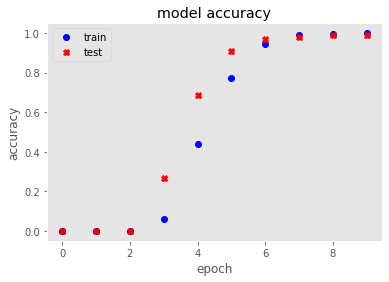

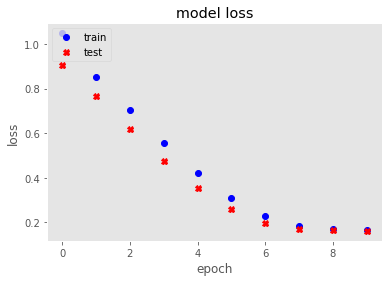

In [ ]:
plt.plot(M.history["accuracy"], "bo")
plt.plot(M.history["val_accuracy"], "rX")
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"],loc="upper left")
plt.grid()
plt.show()

plt.plot(M.history["loss"], "bo")
plt.plot(M.history["val_loss"], "rX")
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"],loc="upper left")
plt.grid()
plt.show()

In [ ]:
print("[INFO] predicting house prices...")
preds = model.predict(X_testn)

[INFO] predicting house prices...


In [ ]:
diff = preds.flatten() - y_testn
percentDiff = (diff / y_testn) * 100
absPercentDiff = np.abs(percentDiff)

mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

# finally, show some statistics on our model
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] avg. house price: {}, std house price: {}".format(
	locale.currency(df_imgsX["Price"].mean(), grouping=True),
	locale.currency(df_imgsX["Price"].std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))


[INFO] avg. house price: $50.39, std house price: $27.49
[INFO] mean: 442.39%, std: 595.99%


In [ ]:
epoch_loss=np.argmin(M.history["val_loss"])
loss=np.min(M.history["val_loss"])
accuracy=np.max(M.history["val_accuracy"])


In [ ]:
print("Mejor Epoca de perdida:",epoch_loss,"\n mejor Valor de perdida:", loss, "\n mejor Valor de accuracy:",accuracy)

Mejor Epoca de perdida: 14 
 mejor Valor de perdida: 0.13923275470733643 
 mejor Valor de accuracy: 0.9900000095367432
